# Lithology prediction and plotting

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [4]:
df = pd.read_csv('file1046462289.csv')
df.head()

,Depth,CGXT,SMTU,GRGC,SPCG,FEFE,NPRL,CLDC,DCOR,DEN,...,MNRL,MINV,MBTC,HVOL,AVOL,CTAO,R40O,R60O,RTAO,BIT
0,1699.0,-999.25,-999.25,74.655273,342.755129,0.066587,-999.25,8.090829,-999.25,-999.25,...,-999.25,-999.25,-999.25,0.117137,0.063007,0.797272,1254.277906,1254.277906,1254.277906,-999.25
1,1699.5,-999.25,-999.25,67.210760,342.312016,0.065862,-999.25,8.090769,-999.25,-999.25,...,-999.25,-999.25,-999.25,0.117137,0.063007,0.801656,1247.437483,1247.437483,1247.437483,-999.25
2,1700.0,-999.25,-999.25,61.085746,341.922004,0.065413,-999.25,8.090793,-999.25,-999.25,...,-999.25,-999.25,-999.25,0.117137,0.063007,0.804623,1242.818044,1242.818044,1242.818044,-999.25
3,1700.5,-999.25,-999.25,58.320451,341.325809,0.065129,-999.25,8.090767,-999.25,-999.25,...,-999.25,-999.25,-999.25,0.117136,0.063006,0.806937,1239.256386,1239.256386,1239.256386,-999.25
4,1701.0,-999.25,-999.25,58.242153,340.563663,0.065534,-999.25,8.090771,-999.25,-999.25,...,-999.25,-999.25,-999.25,0.117137,0.063007,0.805297,1241.778078,1241.778078,1241.778078,-999.25


In [5]:
df.replace(-999.25, np.nan, inplace=True)

In [6]:
df = df.dropna()

In [7]:
import hemi_imp_blocking as hb

In [8]:
bl_dt = hb.block_multiple(df, ['CGXT','SPCG', 'GRGC', 'NPRL', 'DPRL', 'PDPE', 'SPRL', 'MNRL', 'RTAO'])

In [9]:
bl_dt.head()

,Depth,CGXT,SPCG,GRGC,NPRL,DPRL,PDPE,SPRL,MNRL,RTAO
0,3603.030788,95.144485,322.232536,63.987437,15.025727,4.094012,3.736672,12.206324,19.150467,8.316243
2,3603.101904,95.144485,322.232536,63.987437,15.025727,4.094012,3.736672,12.206324,19.150467,8.316243
3,3603.101904,95.144485,322.232536,63.987437,15.025727,4.094012,3.736672,12.206324,19.150467,6.851039
2,3603.106690,95.144485,322.232536,63.987437,15.025727,4.094012,3.736672,12.206324,19.150467,6.851039
3,3603.106690,95.144485,322.232536,63.987437,15.025727,16.794504,3.736672,12.206324,19.150467,6.851039


In [10]:
bl_dt.set_index('Depth', inplace=True)

In [11]:
loaded_rf = joblib.load("RF_uncompressed.joblib")

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scale = StandardScaler()
svalue = scale.fit_transform(bl_dt[['GRGC', 'PDPE']])

In [14]:
pred = loaded_rf.predict(svalue)

In [15]:
bl_dt['Predicted_Value'] = pred

In [16]:
Lith = pd.read_csv('Lithology.csv')
Lith.columns = ['TRUE', 'Lithology']
Lith

,TRUE,Lithology
0,2,Halite
1,3,Gypsum
2,4,Dolomite
3,5,Dolomitic Limestone
4,6,Cherty Dolomitic Limestone
5,7,Cherty Dolomite
6,8,Limestone
7,9,Cherty Limestone
8,10,Chert
9,11,Shale


In [17]:
Lith['color_code'] = np.array(['#7ddfbe','#ff80ff', '#8080ff', '#8088ff','#88ffff','#8080ff',
                              '#80ffff','#80ffff','#ff8c00', '#bebebe','#ffe119','#7cfc00','black'])
Lith['Hatch'] = np.array(['x','||','-/','-./','./','+','.+','..','-.','..','--','//-',''])
Lith

,TRUE,Lithology,color_code,Hatch
0,2,Halite,#7ddfbe,x
1,3,Gypsum,#ff80ff,||
2,4,Dolomite,#8080ff,-/
3,5,Dolomitic Limestone,#8088ff,-./
4,6,Cherty Dolomitic Limestone,#88ffff,./
5,7,Cherty Dolomite,#8080ff,+
6,8,Limestone,#80ffff,.+
7,9,Cherty Limestone,#80ffff,..
8,10,Chert,#ff8c00,-.
9,11,Shale,#bebebe,..


In [18]:
import hemi_plot as hp

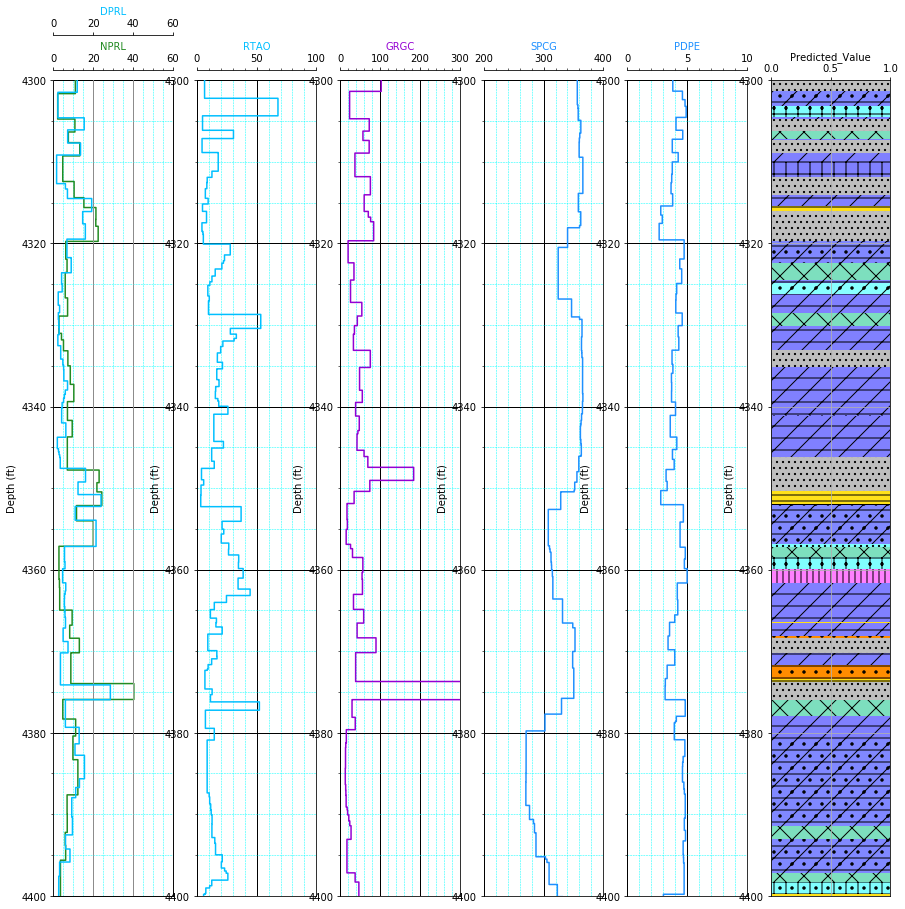

In [24]:
hp.track_plot_lith(bl_dt, track=[['NPRL','DPRL'],['RTAO'],['GRGC'],
                         ['SPCG'], ['PDPE'], ['Predicted_Value']], depth_range=[4300, 4400], track_range=
          [
              [[0,60],[0,60]],
              [[0,100]],
              [[0,300]],
              [[200,400]],
              [[0,10]],
              [[0,10]]], Lith = Lith)

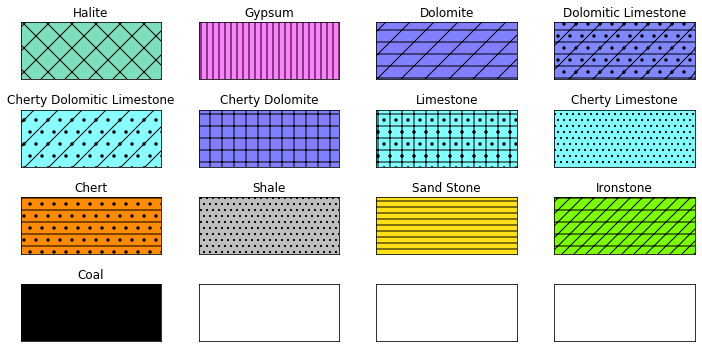

In [23]:
hp.plot_index(Lith=Lith)